In [10]:
from scipy import stats as st
from scipy.stats import chisquare
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import plotly.figure_factory as ff



In [23]:
survey_raw = pd.read_csv("Raw_survey_data.csv")
survey_raw["dummy"] = [1]*1600
survey_raw = survey_raw.rename(columns = {'q4':'LOIF','q5':'LOIM','q8':'LOIT','q17':'House_Status','q18':'Household_Status','q19':'Grocery_Budget_Strictness','Age_Catagory' : 'Age_Category'},errors="raise")
cNames = list(survey_raw.columns.values)
checkList = ['Prefecture_code','TypeOfRes','Sex','Age','Age_Catagory','Sex_Era','Married','Profession','House_Status','Household_Status','Grocery_Budget_Strictness']
cur_pivot = survey_raw.pivot_table("dummy",index = "LOIM",columns = 'Grocery_Budget_Strictness',aggfunc = sum)
cur_pivot = cur_pivot.fillna(0)

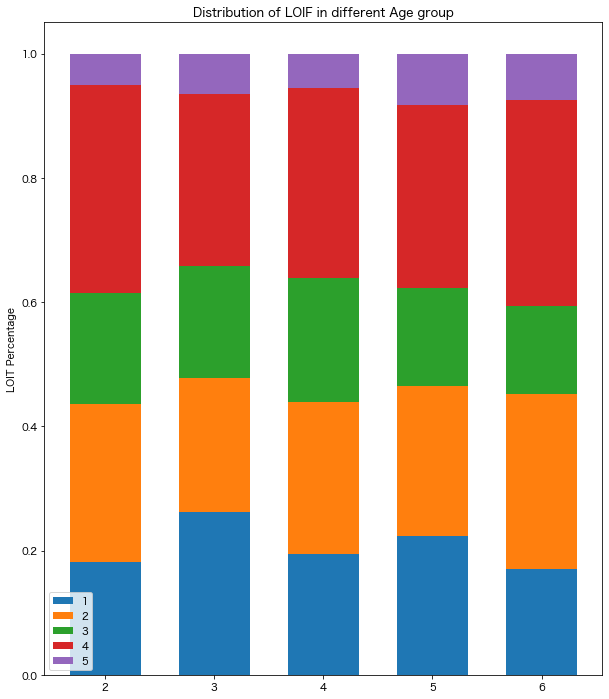

In [12]:
#------------------------------------------------------------------------#
#Anova on Age_Cate frequency                            #  
#------------------------------------------------------------------------#
Age_Catagory_LOTM = survey_raw.pivot_table("dummy",index = "LOIF",columns = "Age_Category" ,aggfunc = sum)

#Get total for each strictness level
Age_Catagory_total = survey_raw.groupby("Age_Category").sum()
total = Age_Catagory_total["dummy"]
allTypes = []
range_ = [i for i in range(1,7)]
for i in range_:
    if i != 1 and i != 4:
        allTypes.append(Age_Catagory_LOTM[i])
sta, p = st.f_oneway(*allTypes)
Age_Catagory_LOTM_freq = Age_Catagory_LOTM/total

#------Graph------#
labels = ["2","3","4","5","6"]
fig, ax = plt.subplots(figsize = (10,12))
ax.bar(labels,Age_Catagory_LOTM_freq.loc[1],width = 0.65,label = "1")
pre = 0
for i in range(2,6): 
    pre = pre+Age_Catagory_LOTM_freq.loc[i-1]
    ax.bar(labels,Age_Catagory_LOTM_freq.loc[i],width = 0.65,bottom=pre,label = str(i))
ax.set_ylabel("LOIT Percentage")
ax.set_title("Distribution of LOIF in different Age group")
ax.legend()
plt.show()

In [13]:
Age_Catagory_LOTM_freq

Age_Category,2,3,4,5,6
LOIF,,,,,
1,0.181818,0.261290,0.194444,0.223214,0.169611
2,0.254545,0.216129,0.244949,0.241071,0.282686
3,0.178182,0.180645,0.199495,0.157738,0.141343
4,0.334545,0.277419,0.305556,0.294643,0.332155
5,0.050909,0.064516,0.055556,0.083333,0.074205


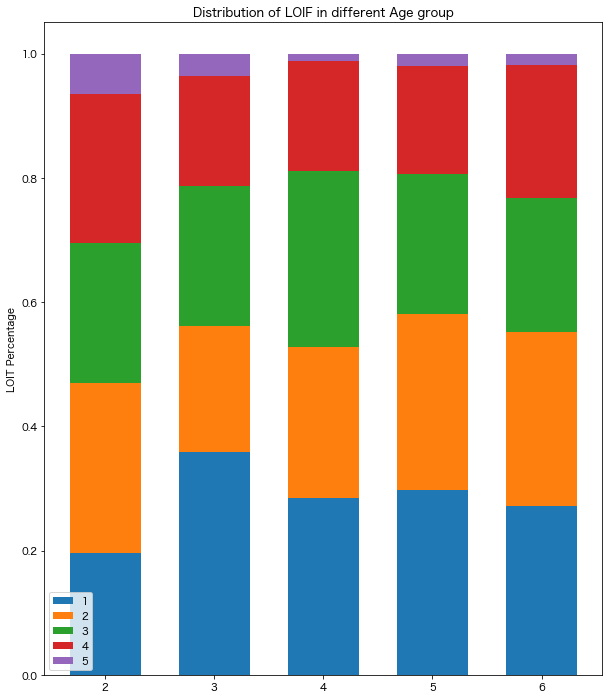

In [14]:
#------------------------------------------------------------------------#
#Anova on Age_Cate frequency                            #  
#------------------------------------------------------------------------#
Age_Catagory_LOTM = survey_raw.pivot_table("dummy",index = "LOIT",columns = "Age_Category" ,aggfunc = sum)

#Get total for each strictness level
Age_Catagory_total = survey_raw.groupby("Age_Category").sum()
total = Age_Catagory_total["dummy"]
allTypes = []
range_ = [i for i in range(1,7)]
for i in range_:
    if i != 1 and i != 4:
        allTypes.append(Age_Catagory_LOTM[i])
sta, p = st.f_oneway(*allTypes)
Age_Catagory_LOTM_freq = Age_Catagory_LOTM/total

#------Graph------#
labels = ["2","3","4","5","6"]
fig, ax = plt.subplots(figsize = (10,12))
ax.bar(labels,Age_Catagory_LOTM_freq.loc[1],width = 0.65,label = "1")
pre = 0
for i in range(2,6): 
    pre = pre+Age_Catagory_LOTM_freq.loc[i-1]
    ax.bar(labels,Age_Catagory_LOTM_freq.loc[i],width = 0.65,bottom=pre,label = str(i))
ax.set_ylabel("LOIT Percentage")
ax.set_title("Distribution of LOIF in different Age group")
ax.legend()
plt.show()

In [17]:
Age_Catagory_LOTM = survey_raw.pivot_table("dummy",index = "LOIT",columns = "Grocery_Budget_Strictness" ,aggfunc = sum)

#Get total for each strictness level
Age_Catagory_total = survey_raw.groupby("Grocery_Budget_Strictness").sum()
total = Age_Catagory_total["dummy"]
allTypes = []
range_ = [i for i in range(1,7)]
for i in range_:
    if i != 1 and i != 4:
        allTypes.append(Age_Catagory_LOTM[i])
sta, p = st.f_oneway(*allTypes)
Age_Catagory_LOTM_freq = Age_Catagory_LOTM/total



In [18]:
Age_Catagory_LOTM_freq

Grocery_Budget_Strictness,1,2,3,4,5,6
LOIT,,,,,,
1,0.258065,0.183673,0.260417,0.230769,0.328767,0.410638
2,0.129032,0.300292,0.225694,0.282967,0.260274,0.234043
3,0.290323,0.218659,0.340278,0.219780,0.191781,0.204255
4,0.209677,0.239067,0.152778,0.250000,0.205479,0.138298
5,0.112903,0.058309,0.020833,0.016484,0.013699,0.012766


In [24]:
Age_Catagory_LOTM = survey_raw.pivot_table("dummy",index = "LOIM",columns = "Grocery_Budget_Strictness" ,aggfunc = sum)

#Get total for each strictness level
Age_Catagory_total = survey_raw.groupby("Grocery_Budget_Strictness").sum()
total = Age_Catagory_total["dummy"]
allTypes = []
range_ = [i for i in range(1,7)]
for i in range_:
    if i != 1 and i != 4:
        allTypes.append(Age_Catagory_LOTM[i])
sta, p = st.f_oneway(*allTypes)
Age_Catagory_LOTM_freq = Age_Catagory_LOTM/total



In [25]:
Age_Catagory_LOTM_freq

Grocery_Budget_Strictness,1,2,3,4,5,6
LOIM,,,,,,
1,0.274194,0.206997,0.246528,0.230769,0.342466,0.438298
2,0.177419,0.306122,0.274306,0.315934,0.273973,0.229787
3,0.193548,0.186589,0.291667,0.184066,0.136986,0.187234
4,0.274194,0.253644,0.145833,0.233516,0.232877,0.131915
5,0.080645,0.046647,0.041667,0.035714,0.013699,0.012766
